# Step 1:- Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 2. Load Files

In [2]:
train = pd.read_csv('/content/train_LZdllcl.csv')
test = pd.read_csv('/content/test_2umaH9m.csv')
sample_submission = pd.read_csv('/content/sample_submission_M0L0uXE.csv')

In [3]:
TARGET = 'is_promoted'
ID_COL = 'employee_id'

In [4]:
# shape of each datasets
print('Train Shape:', train.shape)
print('Test Shape:', test.shape)
print('Sample Submission Shape:', sample_submission.shape)

Train Shape: (54808, 14)
Test Shape: (23490, 13)
Sample Submission Shape: (23490, 2)


# 3. Exploratory Data Analysis

In [5]:
# Overview of train dataset
print('Overview of Train Dataset:\n')
train.head(5)

Overview of Train Dataset:



,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [6]:
# Information of the dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [7]:
# Statistical information about the dataset
train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [8]:
# To check the Value count of the target column
print('Value Count of Target Column:\n')
train[TARGET].value_counts()

Value Count of Target Column:



,count
is_promoted,
0,50140
1,4668


# Step 4: Preprocessing

## 4.1 Preprocessing for Train Dataset

In [9]:
# Find Missing values
print('Missing Values in Train Dataset:\n')
train.isnull().sum()

Missing Values in Train Dataset:



,0
employee_id,0
department,0
region,0
education,2409
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,4124
length_of_service,0


In [10]:
# % of missing values
print('Percentage of Missing Values in Train Dataset:\n')
round(train.isnull().mean()*100, 2)

Percentage of Missing Values in Train Dataset:



,0
employee_id,0.00
department,0.00
region,0.00
education,4.40
gender,0.00
recruitment_channel,0.00
no_of_trainings,0.00
age,0.00
previous_year_rating,7.52
length_of_service,0.00


In [11]:
# Fill the missing values
train['education'] = train['education'].fillna(train['education'].mode()[0])
train['previous_year_rating'] = train['previous_year_rating'].fillna(train['previous_year_rating'].median())

In [12]:
# % of missing values after missing values handling
print('Percentage of Missing Values in Train Dataset After Missing Values Handling:\n')
round(train.isnull().mean()*100, 2)

Percentage of Missing Values in Train Dataset After Missing Values Handling:



,0
employee_id,0.0
department,0.0
region,0.0
education,0.0
gender,0.0
recruitment_channel,0.0
no_of_trainings,0.0
age,0.0
previous_year_rating,0.0
length_of_service,0.0


## 4.2 Preprocessing for Test Dataset

In [13]:
# Find Missing values
print('Missing Values in Train Dataset:\n')
test.isnull().sum()

Missing Values in Train Dataset:



,0
employee_id,0
department,0
region,0
education,1034
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,1812
length_of_service,0


In [14]:
# % of missing values
print('Percentage of Missing Values in Test Dataset:\n')
round(test.isnull().mean()*100, 2)

Percentage of Missing Values in Test Dataset:



,0
employee_id,0.00
department,0.00
region,0.00
education,4.40
gender,0.00
recruitment_channel,0.00
no_of_trainings,0.00
age,0.00
previous_year_rating,7.71
length_of_service,0.00


In [15]:
# Fill the missing values
test['education'] = test['education'].fillna(test['education'].mode()[0])
test['previous_year_rating'] = test['previous_year_rating'].fillna(test['previous_year_rating'].median())

In [16]:
# % of missing values after missing values handling
print('Percentage of Missing Values in Train Dataset After Missing Values Handling:\n')
round(test.isnull().mean()*100, 2)

Percentage of Missing Values in Train Dataset After Missing Values Handling:



,0
employee_id,0.0
department,0.0
region,0.0
education,0.0
gender,0.0
recruitment_channel,0.0
no_of_trainings,0.0
age,0.0
previous_year_rating,0.0
length_of_service,0.0


# 5. Data Manipulation

In [17]:
# Select all columns from that is an 'number'
num_cols = train.select_dtypes(include='number').columns.tolist()

# Select all columns form that is an 'object'
cat_cols = train.select_dtypes(include='object').columns.tolist()

In [18]:
# Remove target and id from feature lists.
if TARGET in num_cols:
  num_cols.remove(TARGET)
if ID_COL in num_cols:
  num_cols.remove(ID_COL)
if ID_COL in cat_cols:
  cat_cols.remove(ID_COL)

In [19]:
print('Numerical Columns:', num_cols)
print('Categorical Columns:', cat_cols)

Numerical Columns: ['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'KPIs_met >80%', 'awards_won?', 'avg_training_score']
Categorical Columns: ['department', 'region', 'education', 'gender', 'recruitment_channel']


In [20]:
# Loop
for i in cat_cols:
  print(train[i].value_counts())
  print()

department
Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: count, dtype: int64

region
region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
region_33      269
region_18       31
Name: count, dtype: int64

education
Bachelor's          39078
Mas

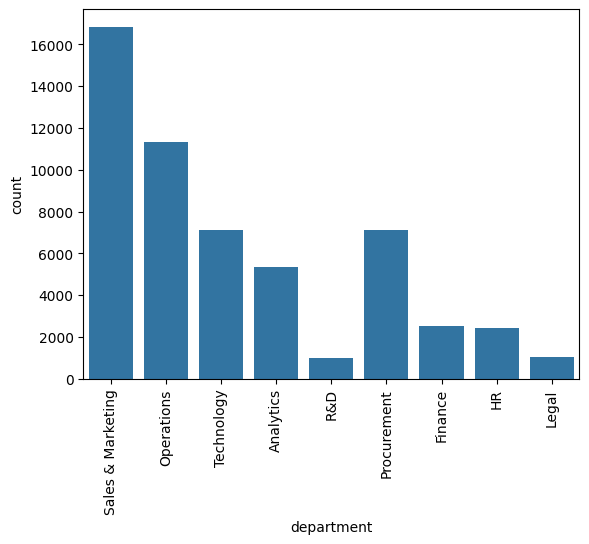

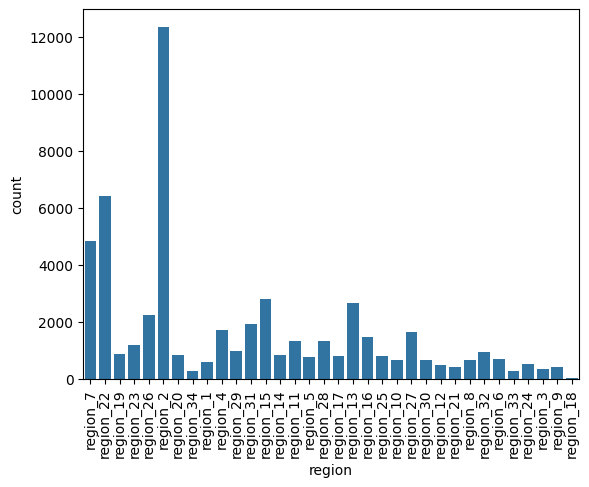

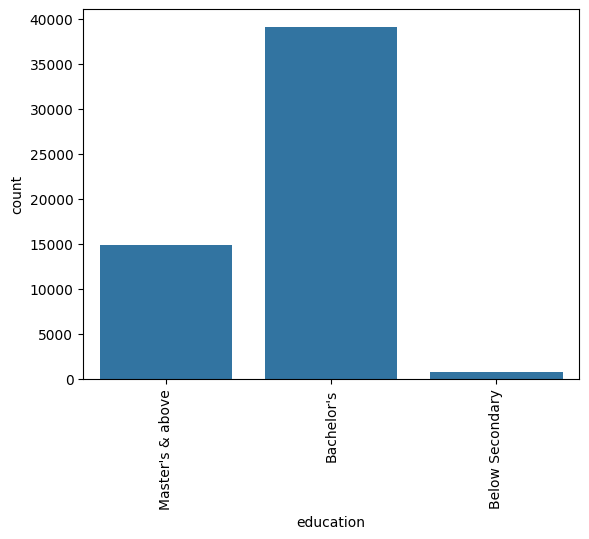

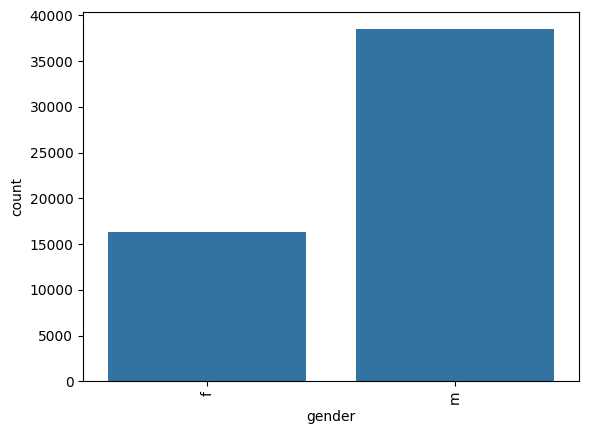

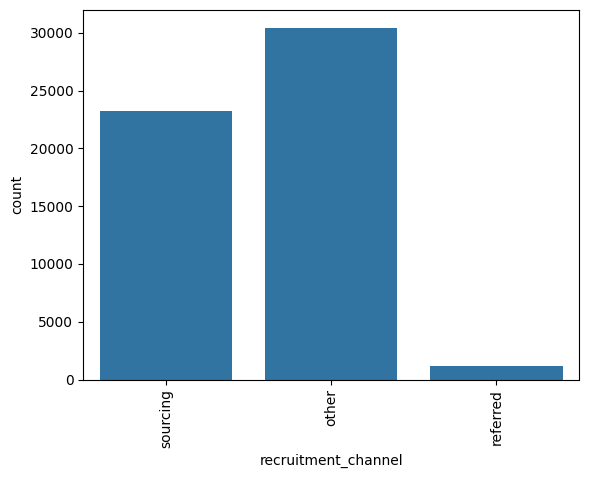

In [21]:
# Countplot of cat columns
for i in cat_cols:
  sns.countplot(data=train, x=i)
  plt.xticks(rotation=90)
  plt.show()

<Axes: >

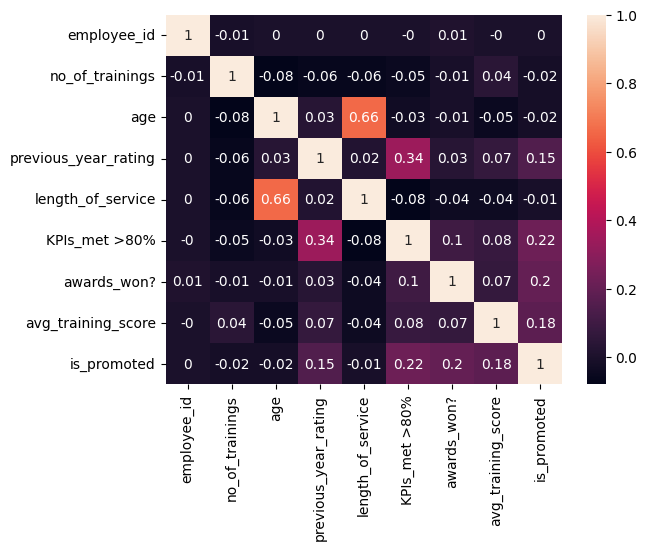

In [22]:
# heat map
sns.heatmap(round(train.select_dtypes('number').corr(),2), annot=True)

# 6. Label Encoding

In [23]:
# --- Categorical columns based on cardinality ---
low_card_cat = ["gender", "education", "recruitment_channel"]
high_card_cat = ["department", "region"]

# --- One-Hot Encoding for Low-Cardinality Columns ---
for col in low_card_cat:
    if col not in train.columns:
        continue  # Skip if missing

    # Fill missing values
    train[col] = train[col].fillna("Unknown")
    test[col] = test[col].fillna("Unknown")

    # One-hot encode
    train_ohe = pd.get_dummies(train[col], prefix=col)
    test_ohe = pd.get_dummies(test[col], prefix=col)

    # Align train and test columns
    train_ohe, test_ohe = train_ohe.align(test_ohe, join="outer", axis=1, fill_value=0)

    # Replace original column with encoded columns
    train = pd.concat([train.drop(columns=[col]), train_ohe], axis=1)
    test = pd.concat([test.drop(columns=[col]), test_ohe], axis=1)

# --- Label Encoding for High-Cardinality Columns ---
for col in high_card_cat:
    if col not in train.columns:
        continue

    # Fill missing values
    train[col] = train[col].fillna("Unknown")
    test[col] = test[col].fillna("Unknown")

    le = LabelEncoder()
    le.fit(train[col])

    # Handle unseen categories in test
    unseen = set(test[col].unique()) - set(le.classes_)
    if unseen:
        le.classes_ = np.append(le.classes_, list(unseen))

    train[col] = le.transform(train[col])
    test[col] = le.transform(test[col])

print("\nEncoding completed successfully.")
print("Train shape after encoding:", train.shape)
print("Test shape after encoding:", test.shape)


Encoding completed successfully.
Train shape after encoding: (54808, 19)
Test shape after encoding: (23490, 18)


In [24]:
print("Train columns:", train.columns.tolist())
print("Test columns:", test.columns.tolist())

Train columns: ['employee_id', 'department', 'region', 'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted', 'gender_f', 'gender_m', "education_Bachelor's", 'education_Below Secondary', "education_Master's & above", 'recruitment_channel_other', 'recruitment_channel_referred', 'recruitment_channel_sourcing']
Test columns: ['employee_id', 'department', 'region', 'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'gender_f', 'gender_m', "education_Bachelor's", 'education_Below Secondary', "education_Master's & above", 'recruitment_channel_other', 'recruitment_channel_referred', 'recruitment_channel_sourcing']


# 6. Feature Engineering

In [25]:

features = [c for c in train.columns if c not in [TARGET, ID_COL]]
x = train[features]
y = train[TARGET]

In [26]:
x

,department,region,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,gender_f,gender_m,education_Bachelor's,education_Below Secondary,education_Master's & above,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,7,31,1,35,5.0,8,1,0,49,True,False,False,False,True,False,False,True
1,4,14,1,30,5.0,4,0,0,60,False,True,True,False,False,True,False,False
2,7,10,1,34,3.0,7,0,0,50,False,True,True,False,False,False,False,True
3,7,15,2,39,1.0,10,0,0,50,False,True,True,False,False,True,False,False
4,8,18,1,45,3.0,2,0,0,73,False,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,8,5,1,48,3.0,17,0,0,78,False,True,True,False,False,False,False,True
54804,4,19,1,37,2.0,6,0,0,56,True,False,False,False,True,True,False,False
54805,0,0,1,27,5.0,3,1,0,79,False,True,True,False,False,True,False,False
54806,7,33,1,29,1.0,2,0,0,45,False,True,True,False,False,False,False,True


In [27]:
y

,is_promoted
0,0
1,0
2,0
3,0
4,0
...,...
54803,0
54804,0
54805,0
54806,0


In [28]:
from collections import Counter
print(y.unique())
Counter(y)

[0 1]


Counter({0: 50140, 1: 4668})

In [29]:
# Calculate Class Imbalance Ratio
maj_cls = train['is_promoted'].value_counts().max()
min_cls = train['is_promoted'].value_counts().min()
ratio = maj_cls / min_cls

print(f"Class Imbalance Ratio: {ratio:.2f}")

Class Imbalance Ratio: 10.74


In [30]:
from imblearn.combine import SMOTETomek

# Apply Hybrid Approach
smote_tomek = SMOTETomek(random_state=42)
x_resampled, y_resampled = smote_tomek.fit_resample(x, y)

print('Original class distribution:\n', y.value_counts())
print('Resampled class distribution:\n', y_resampled.value_counts())

Original class distribution:
 is_promoted
0    50140
1     4668
Name: count, dtype: int64
Resampled class distribution:
 is_promoted
0    50048
1    50048
Name: count, dtype: int64


In [31]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_resampled, y_resampled, test_size=0.20, random_state=42, stratify=y_resampled )


In [32]:
print("Training set shape:", x_train.shape, y_train.shape)
print("Validation set shape:", x_val.shape, y_val.shape)

Training set shape: (80076, 17) (80076,)
Validation set shape: (20020, 17) (20020,)


In [33]:

scaler = StandardScaler()

# Fit on training data only
x_train_scaled = scaler.fit_transform(x_train)

# Transform validation and test sets using same scaler
x_val_scaled = scaler.transform(x_val)

# ML Models

## Default models


In [34]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import f1_score

# Dictionary of models
models = {
    "Logistic Regression": LogisticRegression(max_iter=5000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVC": SVC(random_state=42),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier()
}

# List to store results
results = []

# Loop through models
for name, model in models.items():
    model.fit(x_train_scaled, y_train)
    y_val_pred = model.predict(x_val_scaled)
    f1 = f1_score(y_val, y_val_pred, average='weighted')
    results.append({'Model': name, 'Validation F1 Score': f1})

# Create DataFrame
results_df = pd.DataFrame(results)

# Sort by F1 Score descending
results_df = results_df.sort_values(by='Validation F1 Score', ascending=False).reset_index(drop=True)

# Display table
print(results_df)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


                 Model  Validation F1 Score
0        Random Forest             0.962177
1              XGBoost             0.941774
2        Decision Tree             0.937603
3                  KNN             0.921723
4                  SVC             0.870063
5             AdaBoost             0.866105
6  Logistic Regression             0.838558


Here Best 3 default model are:
  * Random Forest
  * XGBoost
  * Decision Tree

## HyperParameter Tuning With Best Model

In [35]:
from sklearn.metrics import make_scorer, f1_score
# Define models and hyperparameter grids
models_params = {
    "Random Forest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {
            "n_estimators": [50, 100, 200],
            "max_depth": [None, 5, 10, 15],
            "min_samples_split": [2, 5, 10],
            "criterion": ["gini"]
        }
    },
    "XGBoost": {
        "model": xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
        "params": {
            "n_estimators": [50, 100, 150],
            "max_depth": [3, 4, 5],
            "learning_rate": [0.01, 0.1, 0.2],
            "subsample": [0.7, 0.8, 1.0],
            "colsample_bytree": [0.7, 0.8, 1.0]
        }
    },
    "Decision Tree": {
        "model": DecisionTreeClassifier(random_state=42),
        "params": {
            "max_depth": [None, 3, 5, 7, 10],
            "min_samples_split": [2, 5, 10],
            "criterion": ["gini", "entropy"]
        }
    }
}

# F1 scorer
f1_scorer = make_scorer(f1_score, average='weighted')

# List to store results
results = []

# Loop through each model and perform GridSearchCV
for name, mp in models_params.items():
    print(f"Tuning {name}...")
    grid = GridSearchCV(mp['model'], mp['params'], cv=5, scoring=f1_scorer, n_jobs=-1)
    grid.fit(x_train_scaled, y_train)

    # Predict on validation set
    y_val_pred = grid.best_estimator_.predict(x_val_scaled)
    val_f1 = f1_score(y_val, y_val_pred, average='weighted')

    # Store results
    results.append({
        "Model": name,
        "Best Params": grid.best_params_,
        "Validation F1 Score": val_f1
    })

# Create results DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='Validation F1 Score', ascending=False).reset_index(drop=True)

# Display table
print("\n--- Hyperparameter Tuning Results ---")
print(results_df)

Tuning Random Forest...
Tuning XGBoost...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [09:14:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Tuning Decision Tree...

--- Hyperparameter Tuning Results ---
           Model                                        Best Params  \
0  Random Forest  {'criterion': 'gini', 'max_depth': None, 'min_...   
1  Decision Tree  {'criterion': 'entropy', 'max_depth': None, 'm...   
2        XGBoost  {'colsample_bytree': 1.0, 'learning_rate': 0.2...   

   Validation F1 Score  
0             0.961927  
1             0.940659  
2             0.938982  


Here, We choose the best parameter as Decision Tree.

In [64]:
# Extract best params for Decision Tree Classifier
best_params = results_df.loc[1, 'Best Params']

# Initialize Decision Tree Classifier with best hyperparameters
best_model = DecisionTreeClassifier(**best_params, random_state=42)

# Fit on full training data (train + validation combined for better learning)
X_full = pd.concat([pd.DataFrame(x_train_scaled), pd.DataFrame(x_val_scaled)])
y_full = pd.concat([y_train, y_val])

best_model.fit(X_full, y_full)

DecisionTreeClassifier(criterion='entropy', min_samples_split=5,
                       random_state=42)

# Prediction with Test Dataset

In [65]:
# Select the same features used for training
X_test = test[features]

# Apply the SAME scaler used earlier
X_test_scaled = scaler.transform(X_test)

In [66]:
# Predict using the best model
y_test_pred = best_model.predict(X_test_scaled)
y_test_pred

array([0, 0, 0, ..., 0, 0, 1])

In [67]:
# Create submission file
sample_submission[TARGET] = y_test_pred
sample_submission.head()

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0


In [68]:
# Save to CSV for submission
sample_submission.to_csv('sample_submission_M0L0uXE.csv', index=False)

In [69]:
# To Download The File
from google.colab import files
files.download('sample_submission_M0L0uXE.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>